# Capstone Project - The Battle of the Neighborhoods (Week 2)
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data Description](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

The Delhi government has decided to remodel around 16 existing hospitals so as to enhance the number of existing beds as per Floor Area Ratio (FAR) norms. Around 7,000 new beds will be added as per planned remodelling of these existing 16 hospitals, it said.
### Business Problem
The objective of this project is to take part of this remodelling process therefore, the proposal to make a new hospital having 500 beds. For this, the need is to analyse and select the best location in Delhi to open a new hospital. Using Data Science methodology and machine learning techniques as clustering, regression etc., this project aims to answer the business problem: In Delhi, India if government wants to open a hospital, where would the data science team will recommend building it?

### Target Audience of the Project
This hospital will help to overcome the shortage of beds per 1000 population. Currently, the total number of hospital beds in the national capital increased from 48,096 in 2014-15 to 57,194 in the last fiscal, according to Delhi's Economic Survey report. This translated in a jump in beds per 1000 population from 2.68 to 2.99 in the corresponding periods. Delhi government need to further improve his number and provide the best health practices to its people and decline the death rate due to poor health care facilities in the country.

We will use our data science powers to generate a few most promissing neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data Description<a name="data"></a>

### 1. Install and Load required libraries

In [1]:
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes
!conda install -c conda-forge beautifulsoup4 --yes

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    numpy-1.18.1               |   py36h95a1406_0         5.2 MB  conda-forge
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    sci

In [2]:
pip install geocoder

     |████████████████████████████████| 102kB 19.7MB/s ta 0:00:01
     |████████████████████████████████| 829kB 31.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 18.7MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
Successfully built future
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
#import geocoder # to get coordinates

import requests # library to handle requests
from bs4 import BeautifulSoup # library to parse HTML and XML documents

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import seaborn as sns # for visualization
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library
import time
import geocoder 

print("Libraries imported.")




Libraries imported.


### 2. Data Extaraction - (A) Delhi district and population data

In [4]:
link=("https://www.census2011.co.in/census/state/districtlist/delhi.html")
page = requests.get(link)
soup = BeautifulSoup(page.content, 'html.parser')
table = soup.find("table")
output_rows = []
for table_row in table.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)
names = ['#','District','Sub-District','Population','Increase','Sex Ratio','Literacy','Density']
df = pd.DataFrame(data=output_rows,columns = names)
df = df.replace('\n','', regex=True)
df = df.dropna(how='any', axis=0) 
df.drop(["#","Sub-District"],axis=1,inplace=True)
df    

,District,Population,Increase,Sex Ratio,Literacy,Density
1,North West Delhi,"3,656,539",27.81 %,865,84.45 %,8254
2,South Delhi,"2,731,929",20.51 %,862,86.57 %,11060
3,West Delhi,"2,543,243",19.46 %,875,86.98 %,19563
4,South West Delhi,"2,292,958",30.65 %,840,88.28 %,5446
5,North East Delhi,"2,241,624",26.78 %,886,83.09 %,36155
6,East Delhi,"1,709,346",16.79 %,884,89.31 %,27132
7,North Delhi,"887,978",13.62 %,869,86.85 %,14557
9,Central Delhi,"582,320",-9.91 %,892,85.14 %,27730
10,New Delhi,"142,004",-20.72 %,822,88.34 %,4057


### (B) List of Sub Division & Headquareters

In [6]:
link=("https://en.wikipedia.org/wiki/List_of_districts_of_Delhi")
wikipedia_page = requests.get(link)
soup = BeautifulSoup(wikipedia_page.content, 'html.parser')
table = soup.find('table', {'class':'wikitable'})
output_rows = []
for table_row in table.findAll('tr'):
    columns = table_row.findAll('td')
    output_row = []
    for column in columns:
        output_row.append(column.text)
    output_rows.append(output_row)
names = ['#','District','Headquarter','Sub_divisions_1','Sub_divisions_2','Sub_divisions_3']
df1 = pd.DataFrame(data=output_rows,columns = names)
df1 = df1.replace('\n','', regex=True)
df1 = df1.dropna(how='any', axis=0)
df1.drop(["#"],axis=1,inplace=True)
df1


,District,Headquarter,Sub_divisions_1,Sub_divisions_2,Sub_divisions_3
1,New Delhi,Connaught Place,Chanakyapuri,Delhi Cantonment,Vasant Vihar
2,North Delhi,Alipur,Model Town[3],Narela,Alipur
3,North West Delhi,Kanjhawala,Rohini,Kanjhawala,Saraswati Vihar
4,West Delhi,Rajouri Garden,Patel Nagar,Punjabi Bagh,Rajouri Garden
5,South West Delhi,Dwarka,Dwarka,Najafgarh,Kapashera
6,South Delhi,Saket,Saket,Hauz Khas,Mehrauli
7,South East Delhi,Defence Colony,Defence Colony,Kalkaji,Sarita Vihar
8,Central Delhi,Daryaganj,Kotwali,Civil Lines,Karol Bagh
9,North East Delhi,Nand Nagri,Seelampur,Yamuna Vihar,Karawal Nagar
10,Shahdara,Shahdara,Shahdara,Seemapuri,Vivek Vihar


In [7]:
Data=pd.merge(df,df1,on="District")
Data

,District,Population,Increase,Sex Ratio,Literacy,Density,Headquarter,Sub_divisions_1,Sub_divisions_2,Sub_divisions_3
0,North West Delhi,"3,656,539",27.81 %,865,84.45 %,8254,Kanjhawala,Rohini,Kanjhawala,Saraswati Vihar
1,South Delhi,"2,731,929",20.51 %,862,86.57 %,11060,Saket,Saket,Hauz Khas,Mehrauli
2,West Delhi,"2,543,243",19.46 %,875,86.98 %,19563,Rajouri Garden,Patel Nagar,Punjabi Bagh,Rajouri Garden
3,North East Delhi,"2,241,624",26.78 %,886,83.09 %,36155,Nand Nagri,Seelampur,Yamuna Vihar,Karawal Nagar
4,East Delhi,"1,709,346",16.79 %,884,89.31 %,27132,Preet Vihar,Gandhi Nagar,Preet Vihar,Mayur Vihar
5,North Delhi,"887,978",13.62 %,869,86.85 %,14557,Alipur,Model Town[3],Narela,Alipur
6,Central Delhi,"582,320",-9.91 %,892,85.14 %,27730,Daryaganj,Kotwali,Civil Lines,Karol Bagh
7,New Delhi,"142,004",-20.72 %,822,88.34 %,4057,Connaught Place,Chanakyapuri,Delhi Cantonment,Vasant Vihar


### (C) Number of health care facilities already present in each distric

In [8]:
# Reference for this data : https://data.gov.in/catalog/district-wise-availability-health-centres-india-0?filters%5Bfield_catalog_reference%5D=95534&format=json&offset=0&limit=6&sort%5Bcreated%5D=desc
# Data is downloaded from this source and cleaned using MS-Excel to get the below list
df2 = pd.read_csv(r'Hospital_District.csv')
df2

,District,Health Facility
0,Central Delhi,415
1,East Delhi,232
2,New Delhi,267
3,North Delhi,323
4,North West Delhi,464
5,North East Delhi,205
6,Shahdara,227
7,South Delhi,187
8,South East Delhi,282
9,South West Delhi,268


### Final Data Frame 

In [9]:
Data = pd.merge(Data,df2,on="District")
Data

,District,Population,Increase,Sex Ratio,Literacy,Density,Headquarter,Sub_divisions_1,Sub_divisions_2,Sub_divisions_3,Health Facility
0,North West Delhi,"3,656,539",27.81 %,865,84.45 %,8254,Kanjhawala,Rohini,Kanjhawala,Saraswati Vihar,464
1,South Delhi,"2,731,929",20.51 %,862,86.57 %,11060,Saket,Saket,Hauz Khas,Mehrauli,187
2,West Delhi,"2,543,243",19.46 %,875,86.98 %,19563,Rajouri Garden,Patel Nagar,Punjabi Bagh,Rajouri Garden,492
3,North East Delhi,"2,241,624",26.78 %,886,83.09 %,36155,Nand Nagri,Seelampur,Yamuna Vihar,Karawal Nagar,205
4,East Delhi,"1,709,346",16.79 %,884,89.31 %,27132,Preet Vihar,Gandhi Nagar,Preet Vihar,Mayur Vihar,232
5,North Delhi,"887,978",13.62 %,869,86.85 %,14557,Alipur,Model Town[3],Narela,Alipur,323
6,Central Delhi,"582,320",-9.91 %,892,85.14 %,27730,Daryaganj,Kotwali,Civil Lines,Karol Bagh,415
7,New Delhi,"142,004",-20.72 %,822,88.34 %,4057,Connaught Place,Chanakyapuri,Delhi Cantonment,Vasant Vihar,267


In [10]:
Data.to_csv("DelhiDistrictData.csv")

This concludes the data gathering phase - we're now ready to use this data for analysis to produce the report on optimal locations for a new Hospital!

## Methodology <a name="methodology"></a>

In this project we will direct our efforts on detecting areas of Delhi that have low hospital density, particularly those with low number of government hospitals. We will limit our analysis to area ~6km around city center.

In first step we have collected the required district wise.

Second step in our analysis will be calculation and exploration of '**hospital density**' across different areas of Delhi.

In third and final step we will focus on most promising areas and within those create **clusters of locations that meet some basic requirements** established in discussion with stakeholders: we will be using **k-means clustering** of those locations to identify general zones / neighborhoods / addresses which should be a starting point for final 'street level' exploration and search for optimal venue location by stakeholders.

## Analysis <a name="analysis"></a>

#### 1. Data Visualization 

In [11]:
# check datatypes :
Data.dtypes

District           object
Population         object
Increase           object
Sex Ratio          object
Literacy           object
Density            object
Headquarter        object
Sub_divisions_1    object
Sub_divisions_2    object
Sub_divisions_3    object
Health Facility     int64
dtype: object

In [12]:
# converting the object datatype to numeric datatype:
Data['Sex Ratio']=Data["Sex Ratio"].astype(int)
Data["Density"]=Data["Density"].astype(int)
Data["Population"] = Data["Population"].apply(lambda x: int(x.split()[0].replace(',', '')))
Data["Increase"] = Data["Increase"].apply(lambda x: float(x.split()[0].replace('%', '')))
Data["Literacy"] =Data["Literacy"].apply(lambda x: float(x.split()[0].replace('%', '')))
Data.dtypes

District            object
Population           int64
Increase           float64
Sex Ratio            int64
Literacy           float64
Density              int64
Headquarter         object
Sub_divisions_1     object
Sub_divisions_2     object
Sub_divisions_3     object
Health Facility      int64
dtype: object

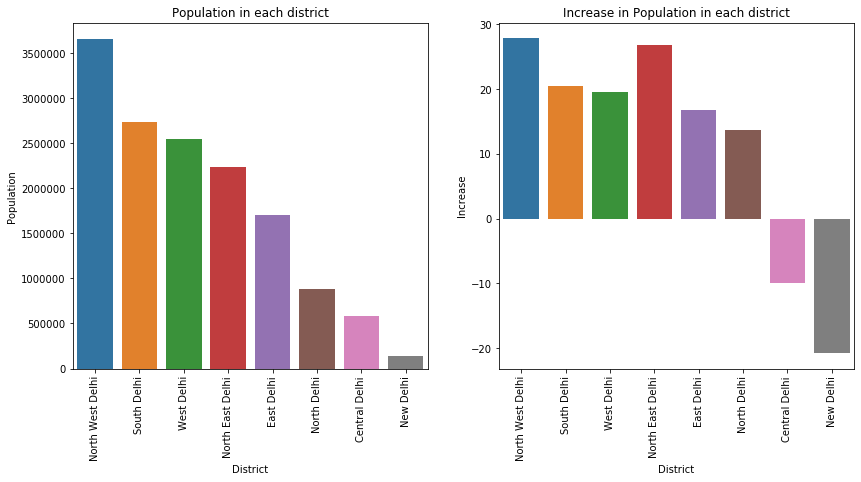

In [13]:
#plotting the graph District vs Population using seaborn barplots.
fig=plt.figure(figsize=(14,14))
ax1=plt.subplot(221)
ax1=plt.xticks(rotation=90)
ax1=sns.barplot(x="District",y="Population",data=Data)
ax1=plt.title("Population in each district")

#plotting the graph District vs Increase in Population using seaborn barplots.
ax2=plt.subplot(222)
ax2=plt.xticks(rotation=90)
ax2=sns.barplot(x="District", y="Increase", data=Data)
ax2=plt.title('Increase in Population in each district')

1. The Maximum population is of "North-west Delhi" having Headquarters at "Kanjhawala"
2. During the years, The population has grown much in the same "North west delhi" while in some places like "Central Delhi" and "North Delhi", it has reduced.


Text(0.5, 1.0, 'Density in each district')

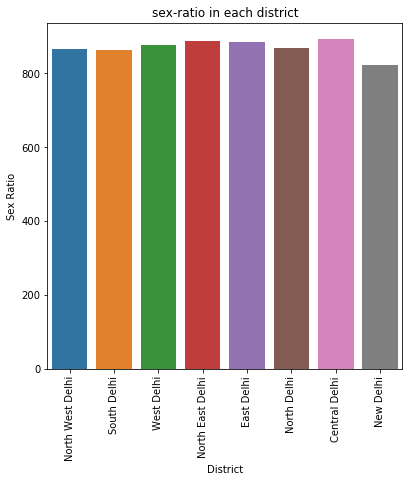

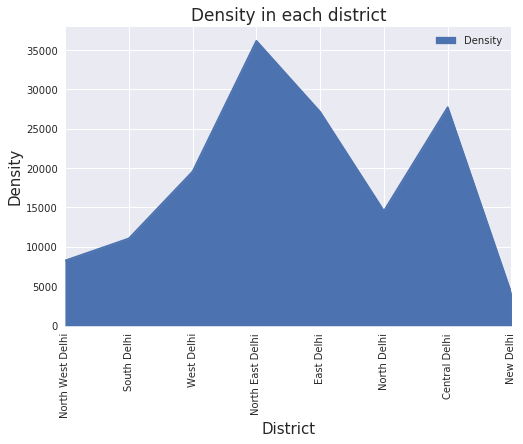

In [14]:
#plotting the graph District vs Sex Ratio using seaborn barplots
fig=plt.figure(figsize=(14,14))
ax3 = plt.subplot(221)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x="District", y="Sex Ratio", data=Data)
ax3 = plt.title('sex-ratio in each district')

#plotting the graph District vs Density using seaborn barplots
plt.style.use('seaborn')
Data.plot.area(x="District",y="Density")
plt.xticks(rotation=90)
plt.xlabel('District', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.title('Density in each district',fontsize=17)

1. The sex-ratio is almost equal in all districts and doesnot matters much.
2. While the density (total number of people per land area) of "North East Delhi" having Headquarter:"Nand Nagri" is the highest.

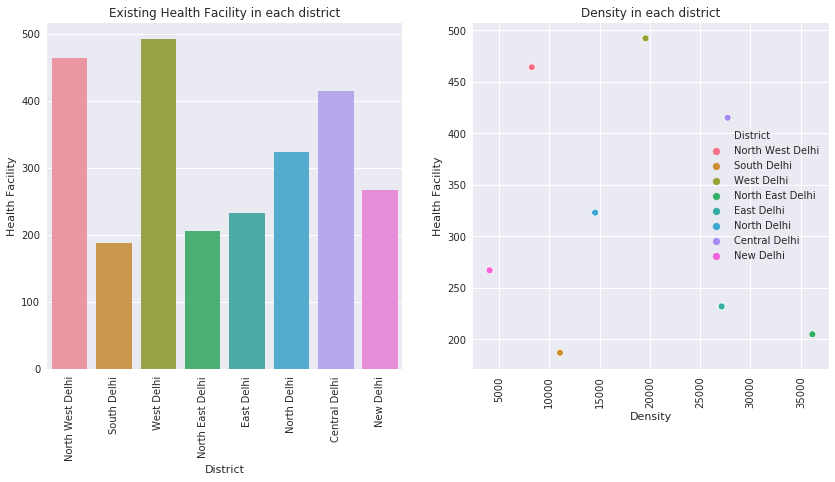

In [15]:
#plotting the graph District vs Sex Ratio using seaborn barplots
fig=plt.figure(figsize=(14,14))
ax3 = plt.subplot(221)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x="District", y="Health Facility", data=Data)
ax3 = plt.title('Existing Health Facility in each district')

#plotting the graph District vs Density using seaborn barplots
ax4 =plt.subplot(222)
ax4 =plt.xticks(rotation=90)
ax4 =sns.scatterplot(x="Density",y="Health Facility",hue="District", data=Data)
ax4 =plt.title("Density in each district")

1. Number of hospitals in South Delhi,North East Delhi,ast Delhi are very less.
2. As we can see in density and health facility chart that all the points are not lying on a single increasing order line according to density this shows some districts have less number of health facility as the population is.

#### 2. Getting Latitudes and Longitudes
In obtaining the location data of the Headquarters of the Districts, the Geocoder package is used with the arcgis_geocoder to obtain the latitude and longitude of the needed locations.

In [16]:
# Geocoder starts here
# Defining a function to use --> get_latlng()
def get_latlng(arcgis_geocoder):
    
    # Initialize the Location (lat. and long.) to "None"
    lat_lng_coords = None
    
    # While loop helps to create a continous run until all the location coordinates are geocoded
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{},New delhi, India'.format(arcgis_geocoder))
        lat_lng_coords = g.latlng
    return lat_lng_coords
# Geocoder ends here

In [17]:
# Applying it to our dataframe:
start = time.time()

Headquarter = df1['Headquarter']    
coordinates = [get_latlng(Headquarter) for Headquarter in Headquarter.tolist()]

end = time.time()
print("Time of execution: ", end - start, "seconds")

df_delhi = df1

# The obtained coordinates (latitude and longitude) are joined with the dataframe as shown
df_coordinates = pd.DataFrame(coordinates, columns = ['Latitude', 'Longitude'])
df_delhi['Latitude'] = df_coordinates['Latitude']
df_delhi['Longitude'] = df_coordinates['Longitude']
#df_delhi.to_csv('DelhiHeadquarterCoordinates.csv', index = False)
df_delhi = df_delhi.dropna(how ='any',axis=0)
df_delhi

Time of execution:  8.1066312789917 seconds


,District,Headquarter,Sub_divisions_1,Sub_divisions_2,Sub_divisions_3,Latitude,Longitude
1,New Delhi,Connaught Place,Chanakyapuri,Delhi Cantonment,Vasant Vihar,28.798050,77.14425
2,North Delhi,Alipur,Model Town[3],Narela,Alipur,28.704865,77.00054
3,North West Delhi,Kanjhawala,Rohini,Kanjhawala,Saraswati Vihar,28.645620,77.12209
4,West Delhi,Rajouri Garden,Patel Nagar,Punjabi Bagh,Rajouri Garden,28.589950,77.04004
5,South West Delhi,Dwarka,Dwarka,Najafgarh,Kapashera,28.524070,77.20677
6,South Delhi,Saket,Saket,Hauz Khas,Mehrauli,28.572980,77.23357
7,South East Delhi,Defence Colony,Defence Colony,Kalkaji,Sarita Vihar,28.628320,77.24727
8,Central Delhi,Daryaganj,Kotwali,Civil Lines,Karol Bagh,28.696710,77.30385
9,North East Delhi,Nand Nagri,Seelampur,Yamuna Vihar,Karawal Nagar,28.689570,77.27802
10,Shahdara,Shahdara,Shahdara,Seemapuri,Vivek Vihar,28.639030,77.29597


#### 3. Map Visualization

Using the geopy library, the latitude and longitude values of Delhi is obtained.

In [18]:
address = 'Delhi,India'
geolocator = Nominatim(user_agent="ld_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of  Delhi are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of  Delhi are 28.6517178, 77.2219388.


In [19]:
latitude = 28.6517178
longitude = 77.2219388
map_1 = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_delhi['Latitude'],df_delhi['Longitude'],df_delhi['Headquarter']):
    label = '{}'.format(Headquarter)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_1)  
    
map_1

### FourSquare API
To use the Foursquare API, we define the Foursquare Credentials and Version as shown below:

Please note that due to privacy, the personal Foursquare Credential has been stored in a .json <fsquarecredential.json> and called appropriately as shown below:

In [20]:
CLIENT_ID = "T1GHZJORJKSKKA3FDN4WAH5T2MWBP5212BOASFVEKKE4DO3F" # your Foursquare ID
CLIENT_SECRET = "KZVE4OPPGYP0QE3PYKNFXT3EQAG5MQMK2WVWGM5NWA30GLCN" # your Foursquare Secret
VERSION = "20180605" # Foursquare API version
LIMIT = 500

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
       # url = https://api.foursquare.com/v2/venues/search?ll=29.253219,-81.732377&categoryId=4bf58dd8d48988d196941735&client_id=MYCLIENTID&client_secret=MYCLIENTSECRET&limit=1&v=20180628
        url = 'https://api.foursquare.com/v2/venues/explore?&categoryId=4bf58dd8d48988d196941735&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Headquarter', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)



### We will only consider all Hospitals from the Delhi_venues.

In [22]:
Delhi_venues = getNearbyVenues(names=df_delhi['Headquarter'],
                                   latitudes=df_delhi['Latitude'],
                                   longitudes=df_delhi['Longitude']
                                  )

Delhi_venues.shape

Connaught Place
Alipur
Kanjhawala
Rajouri Garden
Dwarka
Saket
Defence Colony
Daryaganj
Nand Nagri
Shahdara


(53, 7)

In [23]:
#Create a Data-Frame out of it to Concentrate Only on Restaurants 

Delhi_only_Hospital = Delhi_venues[Delhi_venues['Venue Category'].str.contains('Hospital')].reset_index(drop=True)
Delhi_only_Hospital.index = np.arange(1, len(Delhi_only_Hospital)+1)
print ("Shape of the Data-Frame with Venue Category only Restaurant: ", Delhi_only_Hospital.shape)
Delhi_only_Hospital.groupby('Headquarter').count()

Shape of the Data-Frame with Venue Category only Restaurant:  (53, 7)


,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Headquarter,,,,,,
Daryaganj,4,4,4,4,4,4
Defence Colony,4,4,4,4,4,4
Dwarka,4,4,4,4,4,4
Kanjhawala,10,10,10,10,10,10
Nand Nagri,5,5,5,5,5,5
Rajouri Garden,8,8,8,8,8,8
Saket,3,3,3,3,3,3
Shahdara,15,15,15,15,15,15


Here, We observe that maximum number of Hospitals are located in Shahdara.

Lets, Observe all the headquarters having hospitals superimposed on a map

In [24]:
## Show in Map the Top Rated Restaruants in the Headquarters

map2 = folium.Map(location=[latitude,longitude], zoom_start=11, tiles="openstreetmap")

# set color scheme for the Venues based on the Major Headquarters
Headquarter = ['Daryanganj','Defence Colony','Dwarka','Kanjhawala','Nand Nagri','Rajouri Garden','Saket','Shahdara']
,
x = np.arange(len(Headquarter))

rainbow = ["#5F021F","#34DDDD","#FF0080","#FF9933","#00FF00","#663399",'#FFFF00',"#028482"]

# add markers to the map
# markers_colors = []
for lat, lon, poi, res in zip(Delhi_only_Hospital ['Venue Latitude'], 
                                  Delhi_only_Hospital ['Venue Longitude'], 
                                  Delhi_only_Hospital ['Venue Category'], 
                                  Delhi_only_Hospital ['Headquarter']):
    label = folium.Popup(str(poi) + ' ' + str(res), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
     #   color=rainbow[Headquarter.index(res)-1],
        fill=True,
     #   fill_color=rainbow[Headquarter.index(res)-1],
        fill_opacity=0.3).add_to(map2)
       
map2

In [25]:
print('There are {} unique categories.'.format(len(Delhi_venues['Venue Category'].unique())))
Delhi_unique_count=Delhi_venues['Venue Category'].value_counts().to_frame(name="Count")
Delhi_unique_count

There are 1 unique categories.


,Count
Hospital,53


### 4. Clustering
For this section, the venues will be clustered based on the processed data obtained above.

##### one hot encoding

In [26]:
# one hot encoding 
Delhi_one_hot = pd.get_dummies(Delhi_venues[['Venue Category']], prefix="", prefix_sep="")
# add Headquarter column back to dataframe
Delhi_one_hot['Headquarter'] =Delhi_venues['Headquarter']
# move Headquarter column to the first column
fixed_columns = [Delhi_one_hot.columns[-1]] + list(Delhi_one_hot.columns[:-1])
Delhi_one_hot = Delhi_one_hot[fixed_columns]
print("Therefore, the new one hot encoded dataframe is:",
Delhi_one_hot.shape)
Delhi_one_hot = pd.merge(Delhi_one_hot,Data[['Headquarter','Population','Sex Ratio','Literacy','Density']],on="Headquarter")
Delhi_one_hot

Therefore, the new one hot encoded dataframe is: (53, 2)


,Headquarter,Hospital,Population,Sex Ratio,Literacy,Density
0,Kanjhawala,1,3656539,865,84.45,8254
1,Kanjhawala,1,3656539,865,84.45,8254
2,Kanjhawala,1,3656539,865,84.45,8254
3,Kanjhawala,1,3656539,865,84.45,8254
4,Kanjhawala,1,3656539,865,84.45,8254
5,Kanjhawala,1,3656539,865,84.45,8254
6,Kanjhawala,1,3656539,865,84.45,8254
7,Kanjhawala,1,3656539,865,84.45,8254
8,Kanjhawala,1,3656539,865,84.45,8254
9,Kanjhawala,1,3656539,865,84.45,8254


#### Regrouping and category statistics

In [53]:
Delhi_Grouped = Delhi_one_hot.groupby(['Headquarter','Population','Sex Ratio','Literacy','Density'])['Hospital'].count().reset_index()
Delhi_Grouped.index = np.arange(1, len(Delhi_Grouped)+1)
print("Before One-hot encoding:", df1.shape)
print("After One-hot encoding:", Delhi_Grouped .shape)
Delhi_Grouped_backup = Delhi_Grouped
print(Delhi_Grouped)

Before One-hot encoding: (11, 7)
After One-hot encoding: (5, 6)
      Headquarter  Population  Sex Ratio  Literacy  Density  Hospital
1       Daryaganj      582320        892     85.14    27730         4
2      Kanjhawala     3656539        865     84.45     8254        10
3      Nand Nagri     2241624        886     83.09    36155         5
4  Rajouri Garden     2543243        875     86.98    19563         8
5           Saket     2731929        862     86.57    11060         3


This shows maximum number of government hospital is in Kanjhawala which has maximum number of population. Also based on other parameters we can now cluster these district and find out where we can build the new hospital.

In [54]:
Delhi_Grouped = Delhi_Grouped.drop('Headquarter', 1)
#Delhi_Grouped["Population"] = Delhi_Grouped["Population"].apply(lambda x: int(x.split()[0].replace(',', '')))
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters = kclusters, random_state=0).fit(Delhi_Grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]
Delhi_Grouped.insert(0, 'Cluster Labels', kmeans.labels_)
Delhi_Grouped_backup = pd.merge(Delhi_Grouped,Delhi_Grouped_backup[['Headquarter','Population']],on=['Population'])
Delhi_Grouped_backup
Delhi_Grouped

,Cluster Labels,Population,Sex Ratio,Literacy,Density,Hospital
1,1,582320,892,85.14,27730,4
2,2,3656539,865,84.45,8254,10
3,0,2241624,886,83.09,36155,5
4,0,2543243,875,86.98,19563,8
5,0,2731929,862,86.57,11060,3


### Optimal Number of Clusters for K-means
To get the optimal number of clusters to be used for the K-mean, there are a number ways possible for the evaluation. Therefore, in this task, the following are used:

##### Elbow (Criterion) Method
##### Silhouette Coefficient

###### Elbow Method 
The elbow method is used to solve the problem of selecting k. Interestingly, the elbow method is not perfect either but it gives significant insight that is perhaps not top optimal but sub-optimal to choosing the optimal number of clusters by fitting the model with a range of values for k.

The approach for this is to run the k-means clustering for a range of value k and for each value of k, the Sum of the Squared Errors (SSE) is calculated., calculate sum of squared errors (SSE). When this is done, a plot of k and the corresponding SSEs are then made. At the elbow (just like arm), that is where the optimal value of k is. And that will be the number of clusters to be used. The whole idea is to have minimum SSE.

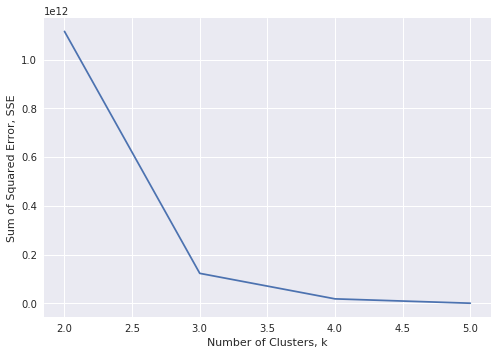

In [46]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# SSE is initialize with empty values
# n_clusters is the "k" 
sse = {}
for n_cluster1 in range(2, 6):
    kmeans1 = KMeans(n_clusters = n_cluster1, max_iter = 500).fit(Delhi_Grouped)
    Delhi_Grouped["Cluster Labels"] = kmeans1.labels_
    
    # The inertia is the sum of distances of samples to their closest cluster centre
    sse[n_cluster1] = kmeans1.inertia_ 
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Clusters, k")
plt.ylabel("Sum of Squared Error, SSE")
# vertical line
plt.vlines(3, ymin = -2, ymax = 45, colors = 'red')
plt.show()

The result shows we can have 3 or 4 clusters . So we will try the results on boh of these values.
##### Silhouette Coefficient
To find the optimal value of the number of clusters, k, the number of clusters is iterated corresponding Silhouette Coefficientis calculated for each of the k-values used. The highest Silhouette Coefficient gives the best match to its own cluster. Please see below:

In [51]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster2 in range(2, 5):
    kmeans2 = KMeans(n_clusters = n_cluster2, random_state = 0).fit(Delhi_Grouped)
    label2 = kmeans2.labels_
    sil_coeff = silhouette_score(Delhi_Grouped, label2, metric = 'euclidean')
    print("Where n_clusters = {}, the Silhouette Coefficient is {}".format(n_cluster2, sil_coeff))

Where n_clusters = 2, the Silhouette Coefficient is 0.5320983549034622
Where n_clusters = 3, the Silhouette Coefficient is 0.42634166942665813
Where n_clusters = 4, the Silhouette Coefficient is 0.19800244904229816


From the result, the high the n_clusters the better the silhouette coefficient. For this project, a cluster value of 3 will be used.

#### Visualizing the resulting clusters

In [70]:
Delhi_clusters = pd.merge(Delhi_Grouped_backup[['Headquarter','Cluster Labels']],df_delhi[['Headquarter','Latitude','Longitude']],on=['Headquarter'])
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Delhi_clusters['Latitude'], Delhi_clusters['Longitude'], Delhi_clusters['Headquarter'], Delhi_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=20,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

display(map_clusters)

### Cluster1

In [67]:
Delhi_Grouped_backup.loc[Delhi_clusters['Cluster Labels'] == 0, Delhi_Grouped_backup.columns[[1] + list(range(1, Delhi_Grouped_backup.shape[1]))]]

,Population,Population,Sex Ratio,Literacy,Density,Hospital,Headquarter
2,2241624,2241624,886,83.09,36155,5,Nand Nagri
3,2543243,2543243,875,86.98,19563,8,Rajouri Garden
4,2731929,2731929,862,86.57,11060,3,Saket


### Cluster2

In [68]:
Delhi_Grouped_backup.loc[Delhi_clusters['Cluster Labels'] == 1, Delhi_Grouped_backup.columns[[1] + list(range(1, Delhi_Grouped_backup.shape[1]))]]

,Population,Population,Sex Ratio,Literacy,Density,Hospital,Headquarter
0,582320,582320,892,85.14,27730,4,Daryaganj


### Cluster3

In [69]:
Delhi_Grouped_backup.loc[Delhi_clusters['Cluster Labels'] == 2, Delhi_Grouped_backup.columns[[1] + list(range(1, Delhi_Grouped_backup.shape[1]))]]

,Population,Population,Sex Ratio,Literacy,Density,Hospital,Headquarter
1,3656539,3656539,865,84.45,8254,10,Kanjhawala


## Result <a name="results"></a>

The following are the highlights obtained from above 3 clusters and the data analysis:

It is surprising to know that despite being the most populated area of delhi, we are have only 10 hospitals in Kanjhawala.
whereas daryaganj has 4 hospitals for 0.5 million people.
Although the clusters have variation, but as compared to population each district is short of hospitals.
The number of number of hospitals is less in cluster 1 as compared to the population they are catering to.




## Conclusion <a name="conclusion"></a>
Although if we see from population density point of view each area requires more number of hospitals to provide health care facilities to more number of people.

But, to be specific it will be beneficial to open a hospital in at Saket South Delhi and Nand Nagri, North East Delhi as this will cater to more population and the provide more health care facilities as there are more people in these areas and less facilities. We were not able to find any venues nearby Kanjhawala , the reason is that Khanjawala is a village and has very less amenities within 1kms.

Some drawback of these analyses is that clustering is done on only the most common venues which are obtained using four square location. Also, we have taken into consideration one city under each district . Also the result can vary if we use other clustering techniques like DBSCAN.

In conclusion, this project would have had better results if there were more data in terms of basic facilities like water etc. within the area, price of the land, traffic access and allowance of more venues exploration with the Foursquare (limited venues for free calls). Also, getting the speciality of hospital within the clusters would have helped in providing more insight into the best location.